# Problem 1

In [1]:
# Probabilities of each weather condition given that the intruder was detected
P_clear_given_detected = 0.60
P_cloudy_given_detected = 0.20
P_rain_given_detected = 0.15
P_snow_given_detected = 0.05

# Probabilities of each weather condition given that the intruder was not detected
P_clear_given_not_detected = 0.40
P_cloudy_given_not_detected = 0.30
P_rain_given_not_detected = 0.20
P_snow_given_not_detected = 0.10

# Probability of detecting an intruder
P_detected = 0.98

# Probability of not detecting an intruder
P_not_detected = 1 - P_detected

# Probabilities of each weather condition
P_clear = P_clear_given_detected * P_detected + P_clear_given_not_detected * P_not_detected
P_cloudy = P_cloudy_given_detected * P_detected + P_cloudy_given_not_detected * P_not_detected
P_rain = P_rain_given_detected * P_detected + P_rain_given_not_detected * P_not_detected
P_snow = P_snow_given_detected * P_detected + P_snow_given_not_detected * P_not_detected

# Probabilities of not detecting an intruder given each weather condition
P_not_detected_given_clear = (P_clear_given_not_detected * P_not_detected) / P_clear
P_not_detected_given_cloudy = (P_cloudy_given_not_detected * P_not_detected) / P_cloudy
P_not_detected_given_rain = (P_rain_given_not_detected * P_not_detected) / P_rain
P_not_detected_given_snow = (P_snow_given_not_detected * P_not_detected) / P_snow

# Print the probabilities
print("Probability of not detecting an intruder given clear weather:", P_not_detected_given_clear)
print("Probability of not detecting an intruder given cloudy weather:", P_not_detected_given_cloudy)
print("Probability of not detecting an intruder given rain:", P_not_detected_given_rain)
print("Probability of not detecting an intruder given snow:", P_not_detected_given_snow)

Probability of not detecting an intruder given clear weather: 0.01342281879194632
Probability of not detecting an intruder given cloudy weather: 0.029702970297029726
Probability of not detecting an intruder given rain: 0.026490066225165587
Probability of not detecting an intruder given snow: 0.03921568627450984


### Based on the calculated probabilities, the weather condition that has the most adverse effects on the intruder detection system is when it's snowing. This is because the probability of not detecting an intruder given snow weather is the highest among all weather conditions, at approximately 0.0392 or 3.92%. This suggests that the system's performance is most negatively affected during snow conditions.

# Problem 2

### Part a

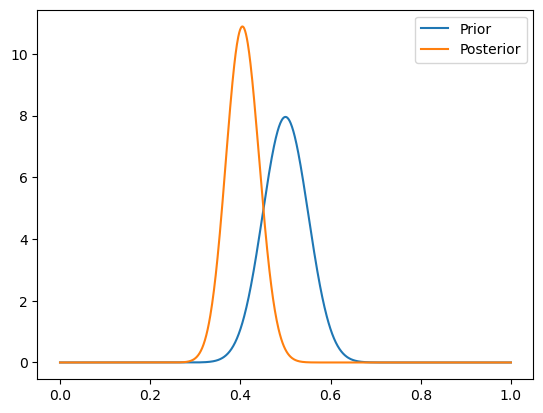

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Prior parameters (Beta distribution)
a_prior = 50  # corresponds to prior mean of 0.5 (a_prior/(a_prior+b_prior))
b_prior = 50  # corresponds to prior std deviation of 0.05

# Data
heads = 23
tails = 80 - heads

# Posterior parameters
a_post = a_prior + heads
b_post = b_prior + tails

# Plotting
x = np.linspace(0, 1, 1000)
y_prior = beta.pdf(x, a_prior, b_prior)
y_post = beta.pdf(x, a_post, b_post)

plt.plot(x, y_prior, label='Prior')
plt.plot(x, y_post, label='Posterior')
plt.legend()
plt.show()

In [3]:
from scipy.stats import binom, norm
from scipy.integrate import quad
import numpy as np

# Prior parameters (Normal distribution)
mu = 0.5
sigma = 0.05

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Likelihood function (Binomial distribution)
def likelihood(p):
    return binom.pmf(k, n, p)

# Prior function (Normal distribution)
def prior(p):
    return norm.pdf(p, mu, sigma)

# Posterior function (product of likelihood and prior)
def posterior(p):
    return likelihood(p) * prior(p)

# Calculate the normalization constant
normalization_constant, error = quad(posterior, 0, 1)

print("Normalization constant:", normalization_constant)

Normalization constant: 0.0011142697343261361


### Part b

In [4]:
from scipy.stats import binom

# Prior distribution
prior = {0.25: 0.5, 0.75: 0.5}

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Calculate the likelihood of the data given each possible value of p
likelihood = {p: binom.pmf(k, n, p) for p in prior.keys()}

# Calculate the unnormalized posterior distribution
posterior_unnormalized = {p: likelihood[p] * prior[p] for p in prior.keys()}

# Normalize the posterior distribution so that the total probability sums to 1
total_probability = sum(posterior_unnormalized.values())
posterior = {p: posterior_unnormalized[p] / total_probability for p in prior.keys()}

# Print the posterior distribution
for p, prob in posterior.items():
    print(f"Probability of p = {p}: {prob}")

Probability of p = 0.25: 1.0
Probability of p = 0.75: 5.996216974838106e-17


### Part c

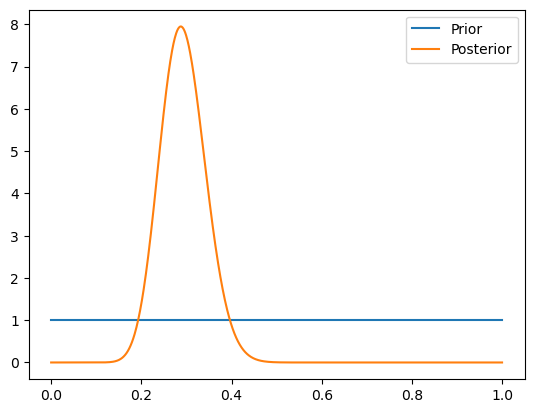

In [5]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

# Prior parameters (Uniform distribution is equivalent to Beta(1, 1))
a_prior = 1
b_prior = 1

# Data
heads = 23
tails = 80 - heads

# Posterior parameters
a_post = a_prior + heads
b_post = b_prior + tails

# Plotting
x = np.linspace(0, 1, 1000)
y_prior = beta.pdf(x, a_prior, b_prior)
y_post = beta.pdf(x, a_post, b_post)

plt.plot(x, y_prior, label='Prior')
plt.plot(x, y_post, label='Posterior')
plt.legend()
plt.show()

### Part d

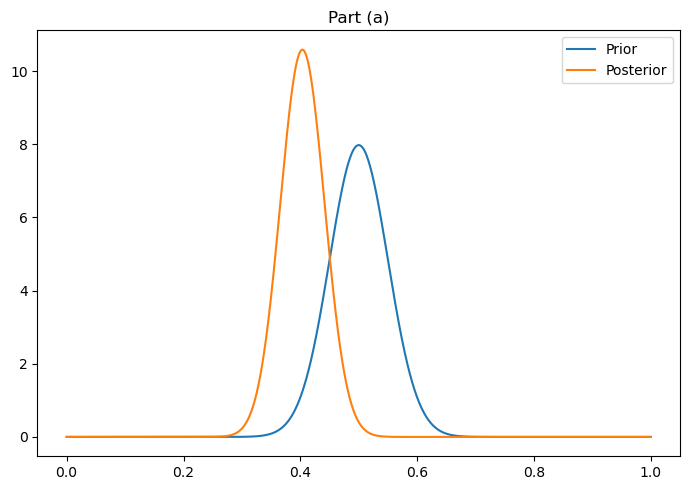

In [7]:
from scipy.stats import norm, binom, beta
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Prior and likelihood for part (a)
mu = 0.5
sigma = 0.05
prior_a = lambda p: norm.pdf(p, mu, sigma)
likelihood = lambda p: binom.pmf(k, n, p)

# Posterior for part (a)
posterior_a_unnormalized = lambda p: likelihood(p) * prior_a(p)
normalization_constant_a, _ = quad(posterior_a_unnormalized, 0, 1)  # numerical integration
posterior_a = lambda p: posterior_a_unnormalized(p) / normalization_constant_a

# Plotting
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(7, 5))

# Part (a)
plt.plot(x, prior_a(x), label='Prior')
plt.plot(x, posterior_a(x), label='Posterior')
plt.title('Part (a)')
plt.legend()

plt.tight_layout()
plt.show()

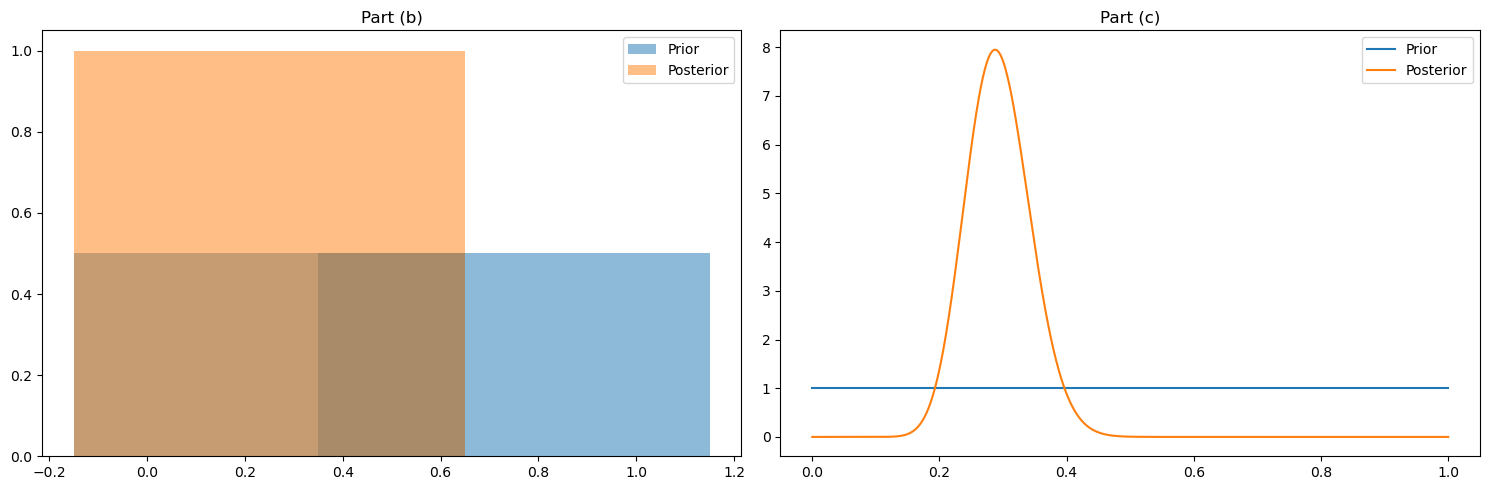

In [8]:
from scipy.stats import binom, beta
import matplotlib.pyplot as plt
import numpy as np

# Data
n = 80  # number of trials
k = 23  # number of successes (heads)

# Likelihood
likelihood = lambda p: binom.pmf(k, n, p)

# Prior and likelihood for part (b)
prior_b = {0.25: 0.5, 0.75: 0.5}

# Posterior for part (b)
posterior_b_unnormalized = {p: likelihood(p) * prior_b[p] for p in prior_b.keys()}
total_probability_b = sum(posterior_b_unnormalized.values())
posterior_b = {p: posterior_b_unnormalized[p] / total_probability_b for p in prior_b.keys()}

# Prior and likelihood for part (c)
a_prior = 1
b_prior = 1

# Posterior for part (c)
a_post = a_prior + k
b_post = b_prior + (n - k)

# Plotting
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(15, 5))

# Part (b)
plt.subplot(1, 2, 1)
plt.bar(prior_b.keys(), prior_b.values(), label='Prior', alpha=0.5)
plt.bar(posterior_b.keys(), posterior_b.values(), label='Posterior', alpha=0.5)
plt.title('Part (b)')
plt.legend()

# Part (c)
plt.subplot(1, 2, 2)
plt.plot(x, beta.pdf(x, a_prior, b_prior), label='Prior')
plt.plot(x, beta.pdf(x, a_post, b_post), label='Posterior')
plt.title('Part (c)')
plt.legend()

plt.tight_layout()
plt.show()

# Problem 3

### Part a

The Beta distribution is a conjugate prior for the Binomial distribution. This means that if the prior distribution is a Beta distribution and the likelihood function is a Binomial distribution, then the posterior distribution is also a Beta distribution.

The Beta distribution is defined as:

Beta(R|α, β) = Γ(α + β) / (Γ(α)Γ(β)) * R^(α-1) * (1 - R)^(β-1)

The Binomial likelihood function is defined as:

L(R|n, k) = C(n, k) * R^k * (1 - R)^(n-k)

where n is the number of trials, k is the number of successes, and C(n, k) is the binomial coefficient.

The posterior distribution is proportional to the product of the prior and the likelihood:

Posterior ∝ Prior * Likelihood

Substituting the Beta prior and Binomial likelihood, we get:

Posterior ∝ R^(α-1) * (1 - R)^(β-1) * R^k * (1 - R)^(n-k)

Simplifying, we get:

Posterior ∝ R^(α+k-1) * (1 - R)^(β+n-k-1)

This is the form of a Beta distribution with parameters α' = α + k and β' = β + n - k. Therefore, the posterior distribution is a Beta distribution.

### Part b

Mean = α / (α + β) Mode = (α - 1) / (α + β - 2) (for α, β > 1) Variance = αβ / [(α + β)^2 * (α + β + 1)]

Given the prior parameters α = 20, β = 2, and the observed data n = 50, k = 49 (one failure means 49 successes), the posterior parameters are α' = α + k = 69 and β' = β + n - k = 3.

We can calculate the mean, mode, and variance of the prior and posterior distributions and discuss the difference.

In [9]:
from scipy.stats import beta

# Prior parameters
alpha_prior = 20
beta_prior = 2

# Data
n = 50
k = 49

# Posterior parameters
alpha_post = alpha_prior + k
beta_post = beta_prior + n - k

# Statistics
mean_prior = beta.mean(alpha_prior, beta_prior)
mode_prior = (alpha_prior - 1) / (alpha_prior + beta_prior - 2)
var_prior = beta.var(alpha_prior, beta_prior)

mean_post = beta.mean(alpha_post, beta_post)
mode_post = (alpha_post - 1) / (alpha_post + beta_post - 2)
var_post = beta.var(alpha_post, beta_post)

print(f"Prior: mean = {mean_prior}, mode = {mode_prior}, variance = {var_prior}")
print(f"Posterior: mean = {mean_post}, mode = {mode_post}, variance = {var_post}")

Prior: mean = 0.9090909090909091, mode = 0.95, variance = 0.0035932446999640674
Posterior: mean = 0.9583333333333334, mode = 0.9714285714285714, variance = 0.0005469939117199391
